## **1. Calling respectives libraries to be used**

In [1]:
import numpy as np
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import system
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score


In [2]:
data=pd.read_csv('HR_comma_sep.csv')
# data description
print(data.head())
print(data.info())
print(data.describe(include ='all'))

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Departments  \
0                   3              0     1                      0       sales   
1                   6              0     1                      0       sales   
2                   4              0     1                      0       sales   
3                   5              0     1                      0       sales   
4                   3              0     1                      0       sales   

   salary  
0     low  
1  mediu

## **2. Data Cleaning**

- Check missing values
- Replace string data into numerical data (sales = 1, accounting = 2, hr=3, technical=4, support=5, management=6, IT=7, product_mng=8, marketing=9, RandD=10)(low=1, moderate=2, high=3)
- Divide the column "average_monthly_hours" with 20 working days (creating a new features)

In [3]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [4]:
data['daily_hours'] = data['average_montly_hours'] / 20

In [5]:
data['Departments'] = data['Departments'].replace({'sales': 1, 'accounting': 2, 'hr': 3, 'technical':4, 'support':5, 'management':6, 'IT':7, 'product_mng':8, 'marketing':9, 'RandD':10})
data['salary'] = data['salary'].replace({'low': 1, 'medium': 2, 'high': 3})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23236\352690676.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Departments'] = data['Departments'].replace({'sales': 1, 'accounting': 2, 'hr': 3, 'technical':4, 'support':5, 'management':6, 'IT':7, 'product_mng':8, 'marketing':9, 'RandD':10})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23236\352690676.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['salary'] = data['salary'].replace({'low': 1, 'medium': 2, 'high': 3})


In [6]:
# check if the content in the 'Departments' and 'salary' columns has been changed
print(data['Departments'].value_counts())
print(data['salary'].value_counts())

Departments
1     4140
4     2720
5     2229
7     1227
8      902
9      858
10     787
2      767
3      739
6      630
Name: count, dtype: int64
salary
1    7316
2    6446
3    1237
Name: count, dtype: int64


## **3. Data Exploration**

In [7]:
data.shape

(14999, 11)

In [8]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments                int64
salary                     int64
daily_hours              float64
dtype: object

In [9]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,daily_hours
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,4.339823,1.594706,10.052517
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.820837,0.637183,2.497155
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.800000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,7.800000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,4.000000,2.000000,10.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,7.000000,2.000000,12.250000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,10.000000,3.000000,15.500000


In [10]:
## Check the distribution of two classes is balance or not
data.groupby(['left'])['left'].count()

left
0    11428
1     3571
Name: left, dtype: int64

## **4. Data Visualization**

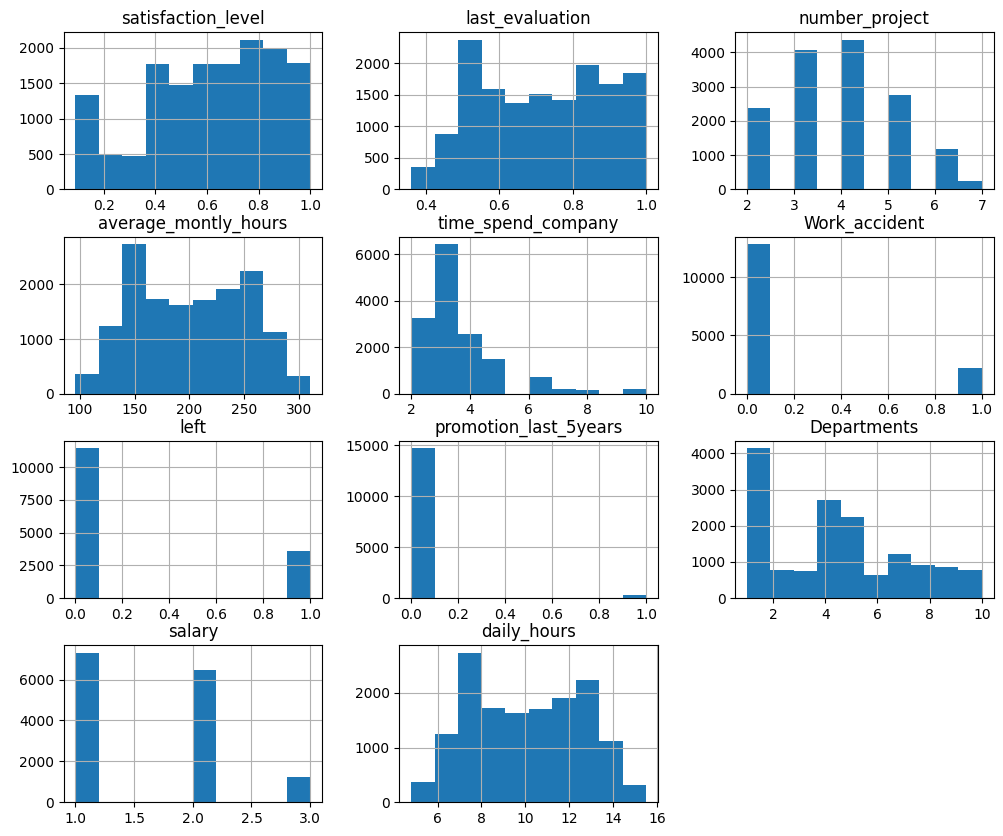

In [11]:
##Data distribution

data.hist(figsize=(12, 10))
plt.show()

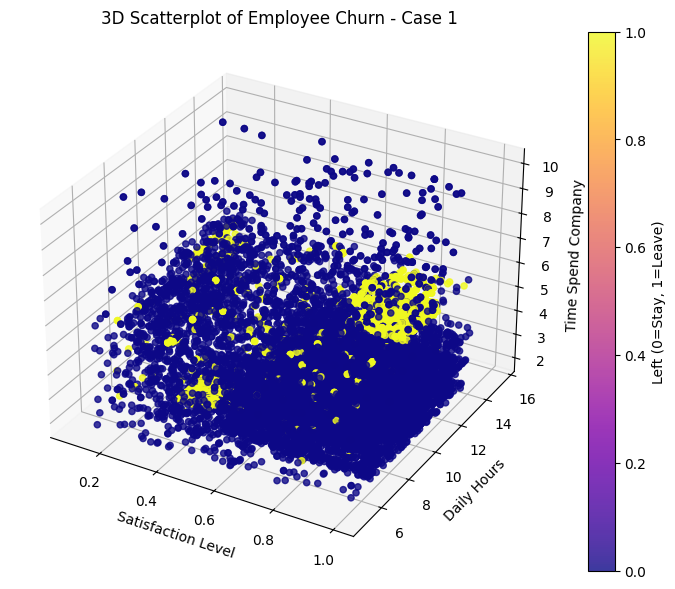

In [12]:
# --- 3D Scatterplot Case 1 ---
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot using three numerical features
x = data['satisfaction_level']
y = data['daily_hours']
z = data['time_spend_company']

scatter = ax.scatter(x, y, z, c=data['left'], cmap='plasma', alpha=0.8)
ax.set_xlabel('Satisfaction Level')
ax.set_ylabel('Daily Hours')
ax.set_zlabel('Time Spend Company')
plt.colorbar(scatter, label='Left (0=Stay, 1=Leave)')
plt.title('3D Scatterplot of Employee Churn - Case 1')
plt.show()

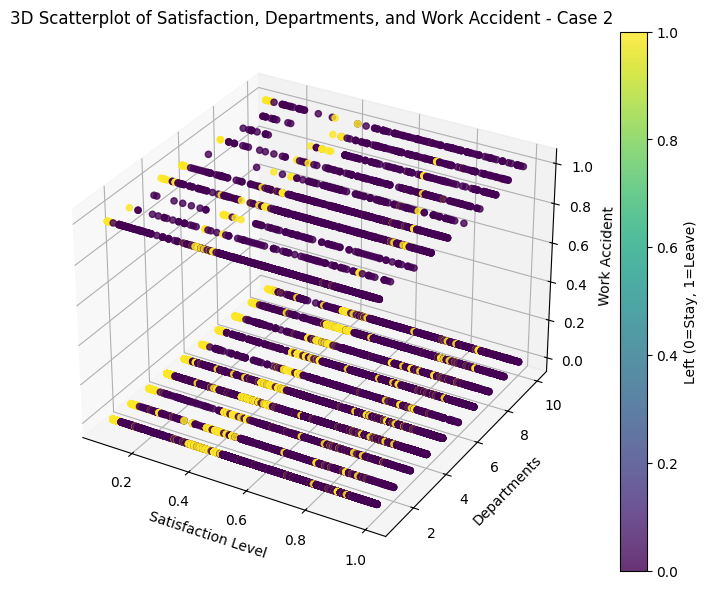

In [13]:
# --- 3D Scatterplot Case 2 ---
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot using different features
x = data['satisfaction_level']
y = data['Departments']
z = data['Work_accident']

scatter = ax.scatter(x, y, z, c=data['left'], cmap='viridis', alpha=0.8)
ax.set_xlabel('Satisfaction Level')
ax.set_ylabel('Departments')
ax.set_zlabel('Work Accident')
plt.colorbar(scatter, label='Left (0=Stay, 1=Leave)')
plt.title('3D Scatterplot of Satisfaction, Departments, and Work Accident - Case 2')
plt.show()

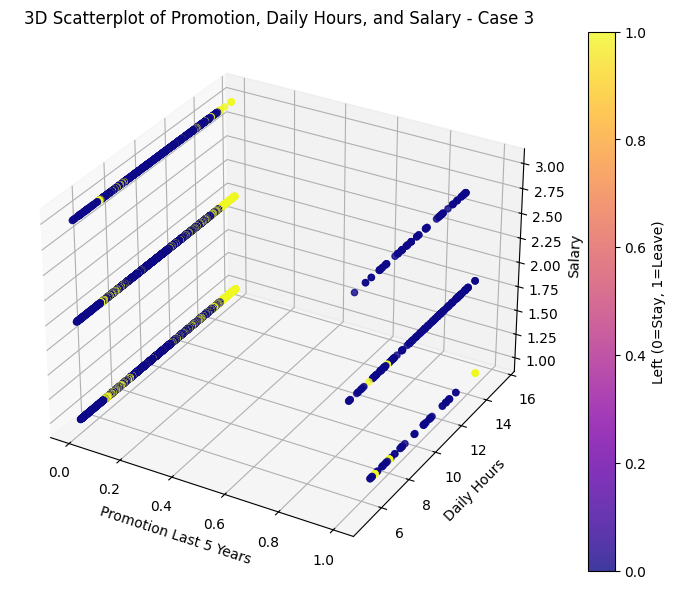

In [14]:
# --- 3D Scatterplot Case 3 ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot using another combination of features
x = data['promotion_last_5years']
y = data['daily_hours']
z = data['salary']

scatter = ax.scatter(x, y, z, c=data['left'], cmap='plasma', alpha=0.8)
ax.set_xlabel('Promotion Last 5 Years')
ax.set_ylabel('Daily Hours')
ax.set_zlabel('Salary')
plt.colorbar(scatter, label='Left (0=Stay, 1=Leave)')
plt.title('3D Scatterplot of Promotion, Daily Hours, and Salary - Case 3')
plt.show()

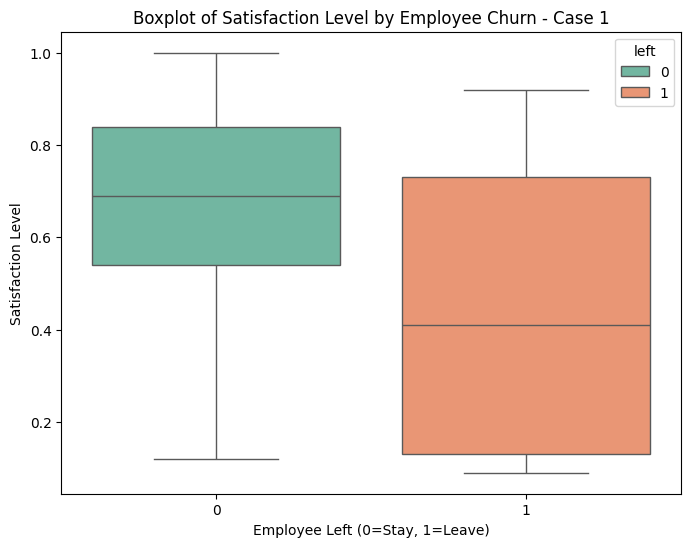

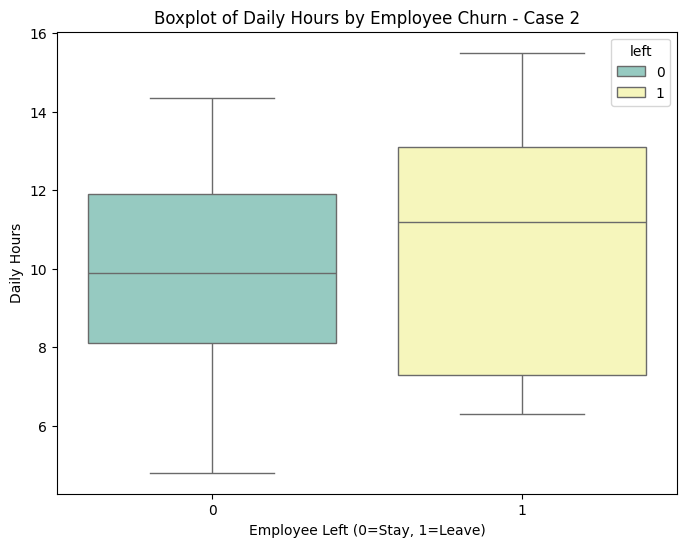

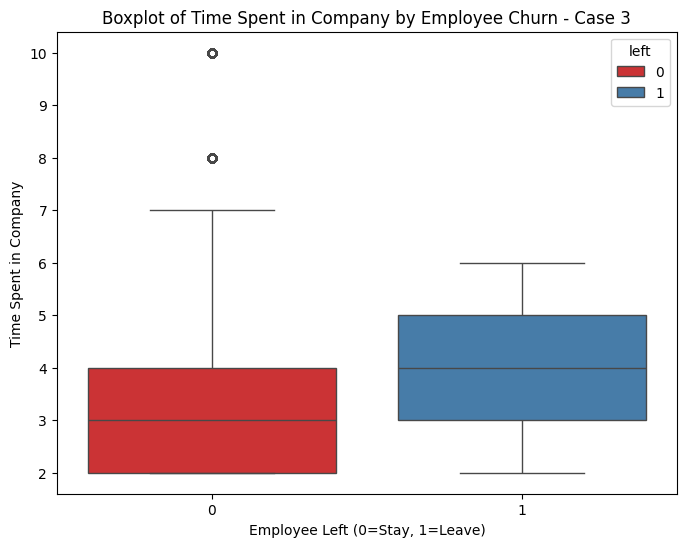

In [15]:
# --- Boxplot Case 1 ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='satisfaction_level', data=data, palette='Set2', hue='left')
plt.xlabel('Employee Left (0=Stay, 1=Leave)')
plt.ylabel('Satisfaction Level')
plt.title('Boxplot of Satisfaction Level by Employee Churn - Case 1')
plt.show()

# --- Boxplot Case 2 ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='daily_hours', data=data, palette='Set3', hue='left')
plt.xlabel('Employee Left (0=Stay, 1=Leave)')
plt.ylabel('Daily Hours')
plt.title('Boxplot of Daily Hours by Employee Churn - Case 2')
plt.show()

# --- Boxplot Case 3 ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='time_spend_company', data=data, palette='Set1', hue='left')
plt.xlabel('Employee Left (0=Stay, 1=Leave)')
plt.ylabel('Time Spent in Company')
plt.title('Boxplot of Time Spent in Company by Employee Churn - Case 3')
plt.show()

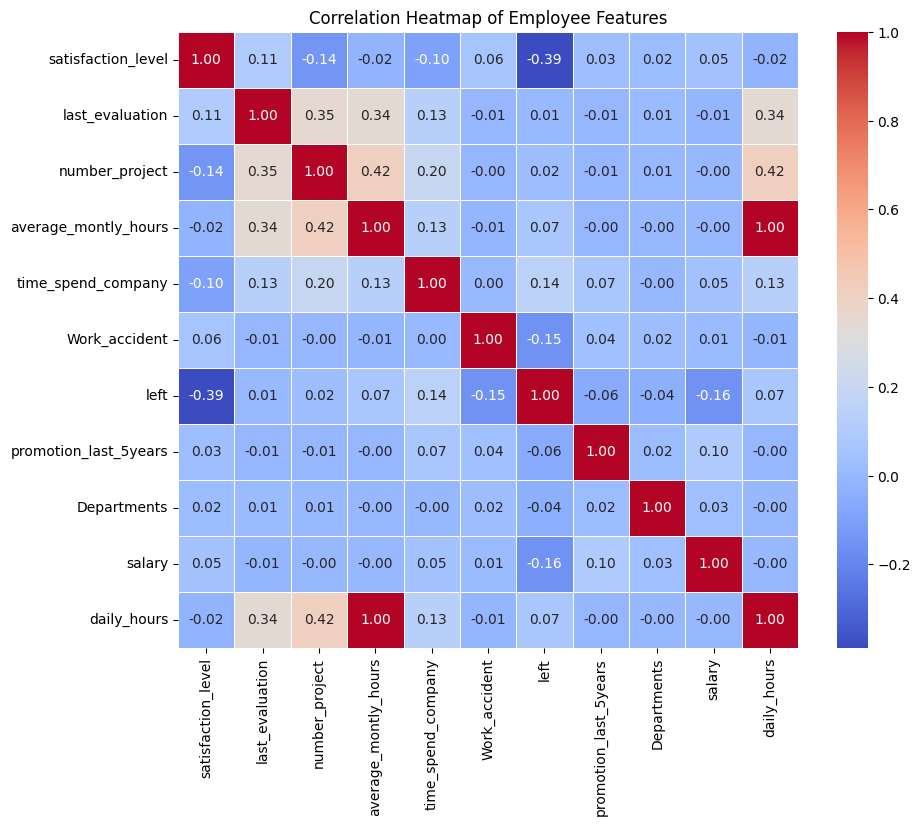

In [16]:
# --- Correlation Heatmap ---
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Employee Features')
plt.show()

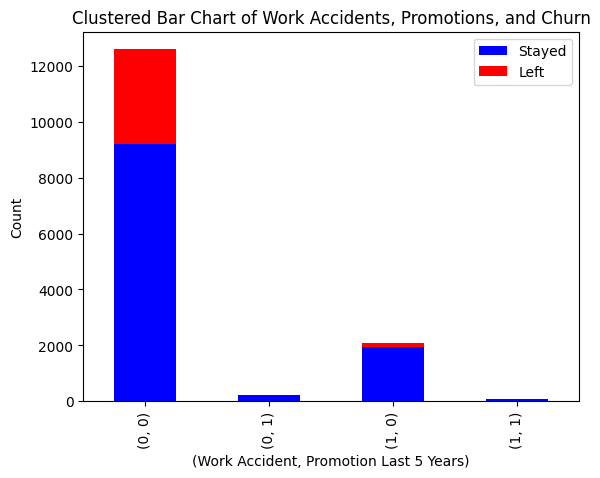

In [17]:
# --- Clustered Bar Chart ---
# Extra one 
pd.crosstab([data['Work_accident'], data['promotion_last_5years']], data['left']).plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Clustered Bar Chart of Work Accidents, Promotions, and Churn')
plt.xlabel('(Work Accident, Promotion Last 5 Years)')
plt.ylabel('Count')
plt.legend(['Stayed', 'Left'])
plt.show()



In [18]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix in tabular format
print("Correlation Coefficients for Key Features:")
print(correlation_matrix.to_string())

Correlation Coefficients for Key Features:
                       satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident      left  promotion_last_5years  Departments    salary  daily_hours
satisfaction_level               1.000000         0.105021       -0.142970             -0.020048           -0.100866       0.058697 -0.388375               0.025605     0.015413  0.050022    -0.020048
last_evaluation                  0.105021         1.000000        0.349333              0.339742            0.131591      -0.007104  0.006567              -0.008684     0.011855 -0.013002     0.339742
number_project                  -0.142970         0.349333        1.000000              0.417211            0.196786      -0.004741  0.023787              -0.006064     0.005577 -0.001803     0.417211
average_montly_hours            -0.020048         0.339742        0.417211              1.000000            0.127755      -0.010143  0.071287            

## **5. Model Development**

### 5.1 Multilayer Perceptron model using only the original parameters

In [33]:
# Split features and target variable
X = data.drop(['left', 'average_montly_hours'], axis=1)
y = data['left']

# Split data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train MLPClassifier with default parameters
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

# Predict on test set
y_pred = mlp.predict(X_test)

# Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2294
           1       0.92      0.90      0.91       706

    accuracy                           0.96      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000

Accuracy Score: 0.958


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 5.2 Multilayer Perceptron model using parameter settings

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2294
           1       0.90      0.86      0.88       706

    accuracy                           0.95      3000
   macro avg       0.93      0.92      0.92      3000
weighted avg       0.95      0.95      0.95      3000

Accuracy Score: 0.9456666666666667

Classification Accuracy: 94.567%


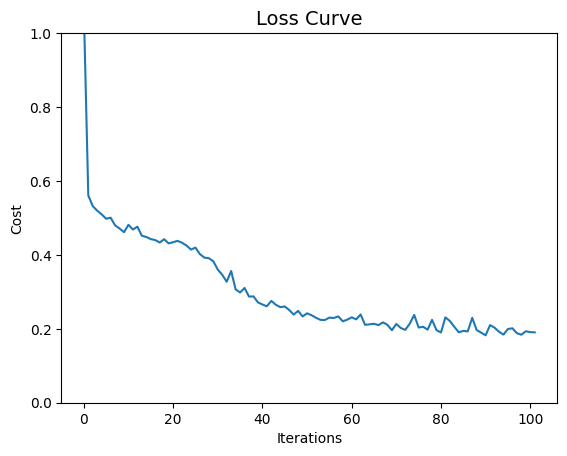

In [20]:
# Split features and target variable
X = data.drop('left', axis=1)
y = data['left']

# Split data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train MLPClassifier with default parameters
mlp = MLPClassifier(hidden_layer_sizes=(15, 10, 5), max_iter=3000, momentum=0.8, tol=0.0005, learning_rate_init=0.005, random_state=42)
mlp.fit(X_train, y_train)

# Predict on test set
y_pred = mlp.predict(X_test)

# Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Calcuate accuracy
print('\nClassification Accuracy: %.3f%%' %(accuracy_score(y_test,y_pred)*100))

#plotting the error / loss curve
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [21]:
# Define parameter grid
from sklearn.model_selection import GridSearchCV


param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
    'alpha': [0.001, 0.01, 0.1],
    'max_iter': [100, 500, 1000],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(X, y)

# Display best parameters and results
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

# Display classification report
print("Classification Report:")
print(classification_report(y, y_pred))

Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'max_iter': 500}
Best Score: 0.9383294925651796
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     11428
           1       0.86      0.88      0.87      3571

    accuracy                           0.94     14999
   macro avg       0.91      0.92      0.91     14999
weighted avg       0.94      0.94      0.94     14999



### **FINAL MODEL DEVELOPMENT (PICKLE FILE)**

In [38]:
# Load dataset
data = pd.read_csv('HR_comma_sep.csv')

# Encode categorical features
data['Departments'] = data['Departments'].replace({'sales': 1, 'accounting': 2, 'hr': 3, 'technical': 4, 'support': 5, 'management': 6, 'IT': 7, 'product_mng': 8, 'marketing': 9, 'RandD': 10})
data['salary'] = data['salary'].replace({'low': 1, 'medium': 2, 'high': 3})

# Add daily_hours feature and preprocess data
data['daily_hours'] = data['average_montly_hours'] / 20
features = ['satisfaction_level', 'last_evaluation', 'number_project', 'daily_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Departments', 'salary']
target = 'left'

# Balance the dataset
data_class_0 = data[data['left'] == 0].sample(3000, random_state=42)
data_class_1 = data[data['left'] == 1].sample(3000, random_state=42)
balanced_data = pd.concat([data_class_0, data_class_1])

# Split into features and target
X = balanced_data[features]
y = balanced_data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create model object for a neural network classifier 
clf = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=500, activation = 'relu', alpha=0.01,
                    solver='adam', random_state=5, tol=0.001, momentum=0.9,
                    verbose=True, learning_rate='constant',learning_rate_init=0.01, early_stopping=True)

# Fit data onto the model
clf.fit(X_train,y_train)

# Make prediction on test dataset
y_pred=clf.predict(X_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

import joblib

# Assuming `best_model` is your trained MLP model
joblib.dump(clf, 'best_mlp_model.pkl')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23236\238664051.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Departments'] = data['Departments'].replace({'sales': 1, 'accounting': 2, 'hr': 3, 'technical': 4, 'support': 5, 'management': 6, 'IT': 7, 'product_mng': 8, 'marketing': 9, 'RandD': 10})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23236\238664051.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['salary'] = data['salary'].replace({'low': 1, 'medium': 2, 'high': 3})


Iteration 1, loss = 0.96198457
Validation score: 0.616667
Iteration 2, loss = 0.57339563
Validation score: 0.818750
Iteration 3, loss = 0.41942035
Validation score: 0.866667
Iteration 4, loss = 0.36322016
Validation score: 0.860417
Iteration 5, loss = 0.32908440
Validation score: 0.885417
Iteration 6, loss = 0.30941378
Validation score: 0.893750
Iteration 7, loss = 0.28174396
Validation score: 0.891667
Iteration 8, loss = 0.26490830
Validation score: 0.910417
Iteration 9, loss = 0.25735584
Validation score: 0.893750
Iteration 10, loss = 0.25433622
Validation score: 0.916667
Iteration 11, loss = 0.24058492
Validation score: 0.906250
Iteration 12, loss = 0.23588361
Validation score: 0.918750
Iteration 13, loss = 0.22425267
Validation score: 0.925000
Iteration 14, loss = 0.21490665
Validation score: 0.920833
Iteration 15, loss = 0.20946662
Validation score: 0.927083
Iteration 16, loss = 0.20837065
Validation score: 0.927083
Iteration 17, loss = 0.21177051
Validation score: 0.900000
Iterat

['best_mlp_model.pkl']

In [28]:
import joblib

# Assuming `best_model` is your trained MLP model
joblib.dump(mlp, 'best_mlp_model.pkl')


['best_mlp_model.pkl']

### **Web application to deploy the model**

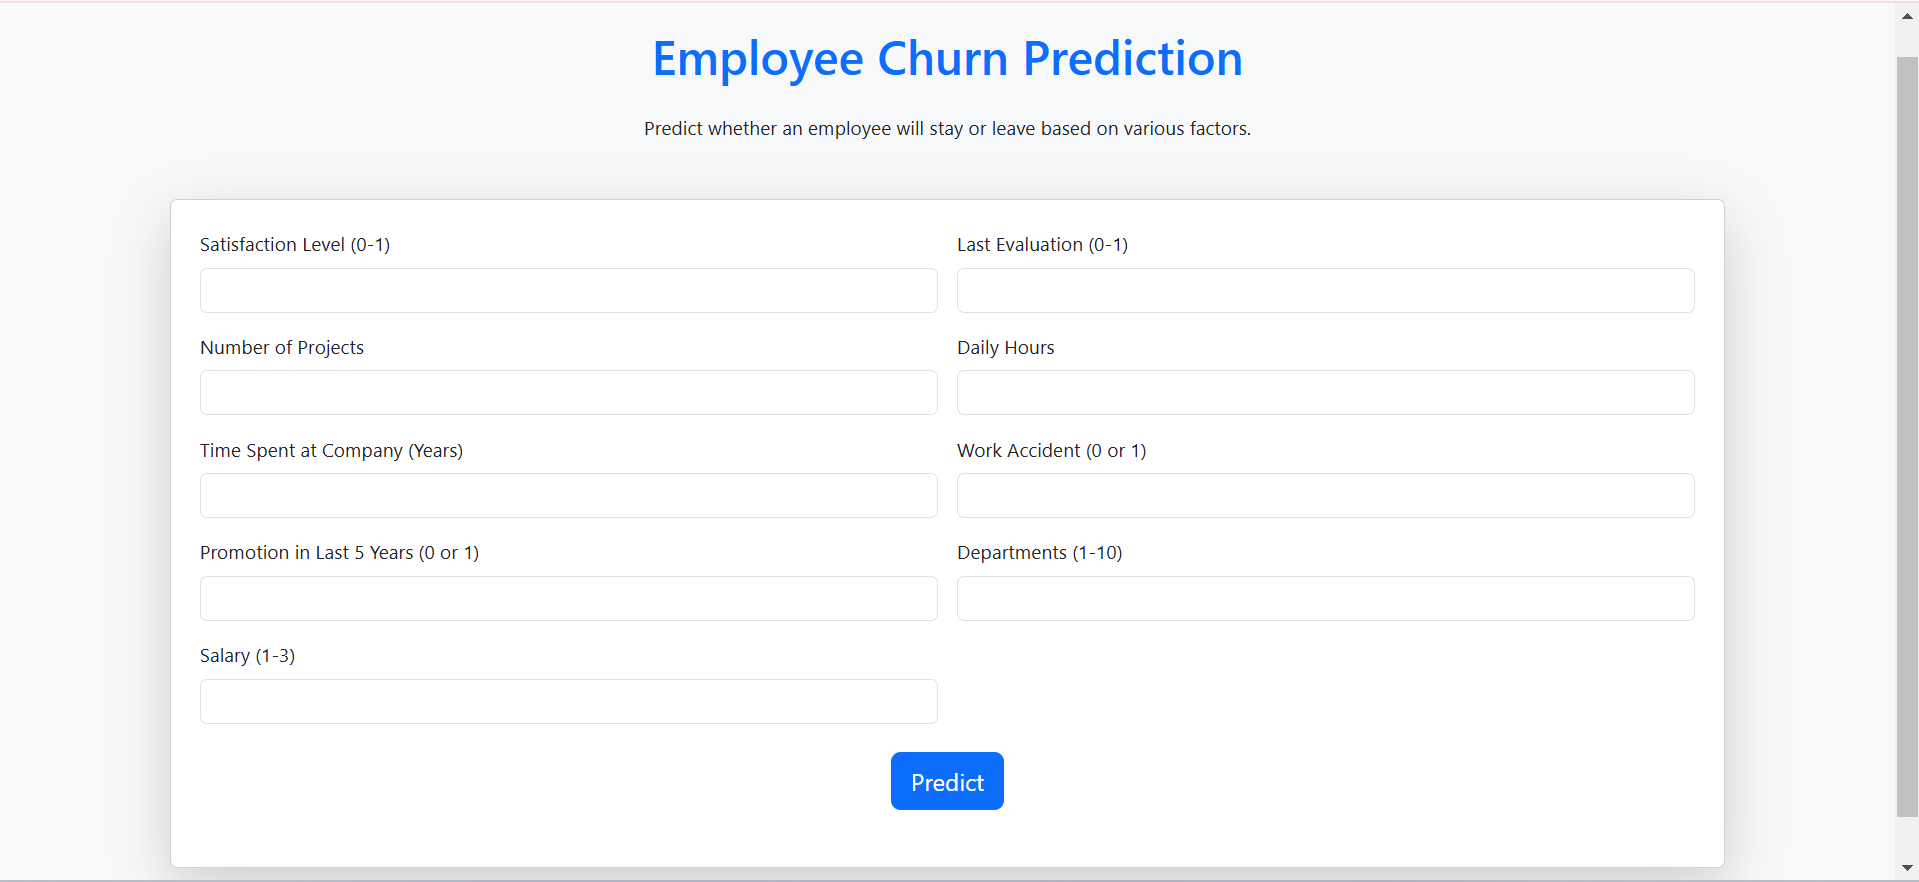